In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import seaborn as sns

In [4]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [5]:
# number of callbacks for black-sounding names
#sum(data[data.race=='b'].call)

In [6]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4870 entries, 0 to 4869
Data columns (total 65 columns):
id                    4870 non-null object
ad                    4870 non-null object
education             4870 non-null int8
ofjobs                4870 non-null int8
yearsexp              4870 non-null int8
honors                4870 non-null int8
volunteer             4870 non-null int8
military              4870 non-null int8
empholes              4870 non-null int8
occupspecific         4870 non-null int16
occupbroad            4870 non-null int8
workinschool          4870 non-null int8
email                 4870 non-null int8
computerskills        4870 non-null int8
specialskills         4870 non-null int8
firstname             4870 non-null object
sex                   4870 non-null object
race                  4870 non-null object
h                     4870 non-null float32
l                     4870 non-null float32
call                  4870 non-null float32
city        

In [8]:
data.describe()

,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,occupbroad,workinschool,...,educreq,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind
count,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,...,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000
mean,3.618480,3.661396,7.842916,0.052772,0.411499,0.097125,0.448049,215.637782,3.481520,0.559548,...,0.106776,0.437166,0.072690,0.082957,0.030390,0.085010,0.213963,0.267762,0.154825,0.165092
std,0.714997,1.219126,5.044612,0.223601,0.492156,0.296159,0.497345,148.127551,2.038036,0.496492,...,0.308866,0.496083,0.259649,0.275854,0.171677,0.278932,0.410141,0.442847,0.361773,0.371308
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,27.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,6.000000,0.000000,0.000000,0.000000,0.000000,267.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,4.000000,9.000000,0.000000,1.000000,0.000000,1.000000,313.000000,6.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,4.000000,7.000000,44.000000,1.000000,1.000000,1.000000,1.000000,903.000000,6.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
data['race'].unique()

array(['w', 'b'], dtype=object)

In [10]:
np.sum(data[data['race']=='b']['call'])

157.0

In [11]:
np.sum(data[data['race']=='w']['call'])

235.0

In [12]:
##### You will perform a statistical analysis to establish whether race has a significant impact
##### on the rate of callbacks for resumes.

In [13]:
#### 1.What test is appropriate for this problem? Does CLT apply?
#### 2.What are the null and alternate hypotheses?
#### 3.Compute margin of error, confidence interval, and p-value.
#### 4.Write a story describing the statistical significance in the context or the original problem.
#### 5.Does your analysis mean that race/name is the most important factor in callback success? Why or why not? 
#### If not, how would you amend your analysis?


In [14]:
## 1: Two sample t test

# z test, if population SD is known, t test if only sample SD is available

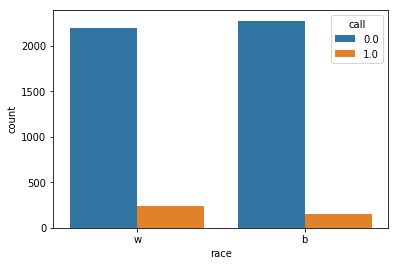

In [15]:
_ = sns.countplot(x='race',hue='call', data=data)

In [16]:
np.sum(data[data['race']=='b']['call'])/np.sum(data['race']=='b')

0.064476386036960986

In [17]:
np.sum(data[data['race']=='w']['call'])/np.sum(data['race']=='w')

0.096509240246406572

In [18]:
b_data = data[data['race'] == 'b'][['call']]

In [19]:
w_data = data[data['race'] == 'w'][['call']]

In [20]:
b_mean = np.mean(b_data)
b_std = np.std(b_data)

In [21]:
w_mean = np.mean(w_data)
w_std = np.std(w_data)

In [22]:
w_mean

call    0.096509
dtype: float32

In [23]:
# Checking data for normality

In [24]:
bsamples =np.random.normal(b_mean, b_std,10000)

In [25]:
wsamples =np.random.normal(w_mean, w_std,10000)

In [26]:
tot_data = np.concatenate((b_data['call'], w_data['call']))

In [27]:
x = np.sort(tot_data)
y = np.arange(1,len(tot_data)+1)/len(tot_data)

In [28]:
x_b = np.sort(bsamples)
y_b = np.arange(1,len(bsamples)+1)/len(bsamples)

x_w = np.sort(wsamples)
y_w = np.arange(1,len(wsamples)+1)/len(wsamples)

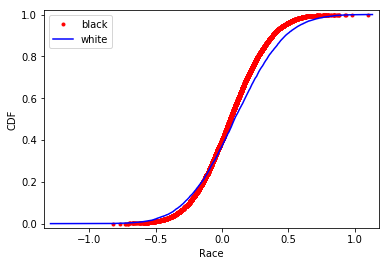

In [29]:
_ = plt.plot(x_b, y_b, marker='.',linestyle='none', color='red',label='black')
_ = plt.plot(x_w, y_w, color='blue',label='white')
#_ = plt.plot(x, y, color='green') # tot_data
plt.margins(0.02)
plt.xlabel('Race')
plt.ylabel('CDF')
plt.legend()

In [30]:
### 1. Both races are normally distributed, so yes CLT applies

#### 2.What are the null and alternate hypotheses?

In [31]:
# H0 = Race does not have a significant impact on the rate of callbacks for resumes.
# H0: Mu = 0

# Ha = Race has significant impact on the rate of callbacks for resumes.
# Ha: Mu >= 0

#### 3.Compute margin of error, confidence interval, and p-value

In [32]:
## We will test the hypothesis that Race b and Race w have identically distributed impact on rate of callbacks. 
## To do this test on two arrays with b_data and w_data, we will concatenate the arrays, and generate a bootstrap sample 
## from it, and take the first n1 entries of the bootstrap sample as belonging to the first data set 
## and the last n2 as belonging to the second. 
## We then compute the test statistic, e.g., the difference of means, to get a bootstrap replicate. 

## The p-value is the number of bootstrap replicates for which the test statistic is less than what was observed

In [33]:
empirical_diff_means = np.mean(b_data['call']) - np.mean(w_data['call'])
print(empirical_diff_means)

-0.03203285485506058


In [34]:
replicates = np.empty(10000)
for i in range(10000):
    bootstrap_sample = np.random.choice(tot_data, len(tot_data))
    replicates[i] = np.mean(bootstrap_sample[:len(b_data)]) - np.mean(bootstrap_sample[len(b_data):])
print(replicates)    

[ 0.00164271  0.00205339 -0.00287474 ..., -0.00657085  0.01889117
  0.00657085]


In [35]:
p_value = np.sum(replicates <= empirical_diff_means)/len(replicates) ### is this correct?
print(p_value)

0.0001


In [36]:
### Calculate the 95% CI
ci_95 = np.percentile(replicates, [2.5, 97.5])
print(ci_95)

[-0.01519507  0.01519507]


In [37]:
## Margin of Error:
ME = 1.96 * (np.std(tot_data)/np.sqrt(len(tot_data)))
print(ME)

0.00764095658379


In [39]:
### Since p-value is small, the results are statiscally significant. We thereby reject the Null hypothesis